# **Nama : M.Nurdin Prastya.H**

# **NIM : 20507334047**

# Times Series Forcasting Untuk Memprediksi Produksi Susu 12 Bulan Terahir Menggunakan peramalan deret waktu jaringan saraf LSTM (Long short term memory) dengan python.

LSTM adalah varian dari RNN (jaringan saraf berulang) dan banyak digunakan untuk proyek deret waktu dalam peramalan dan prediksi masa depan. Dataset yang ada digunakan dalam latihan ini berasal dari github nachi-hebbar ( https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/monthly_milk_production.csv ).

In [1]:
# import library
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

# **PREPOCESING DATA**

In [2]:
# import dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# read data
df = read_csv('/content/drive/MyDrive/PROJEK KECERDASAN BUATAN/FORCASTING/02_FORCASTING WITH LSTM/monthly_milk_production.txt',header=0, index_col='Date', parse_dates= True )
df.index.freq='MS'
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


**Penjelasan**

Dalam kode di atas, kita pertama-tama membaca file CSV yang disimpan di lokasi google drive menggunakan perintah read_csv(). Kemudian, kita menentukan bahwa baris pertama dari file tersebut merupakan nama kolom dengan menggunakan header=0, dan kita juga menentukan bahwa kolom 'Date' akan dijadikan indeks dari DataFrame menggunakan index_col='Date'. Perintah parse_dates=True menunjukkan bahwa kita ingin mengubah tanggal-tanggal yang ada dalam file tersebut menjadi tipe data tanggal.

Setelah membaca file CSV, kita menentukan bahwa indeks dari DataFrame memiliki frekuensi bulanan ('MS' adalah singkatan dari 'month start') dengan menggunakan perintah df.index.freq='MS'. Ini akan membantu kita untuk mengatur waktu yang terkandung dalam DataFrame dengan lebih baik ketika kita melakukan analisis terhadap data tersebut.

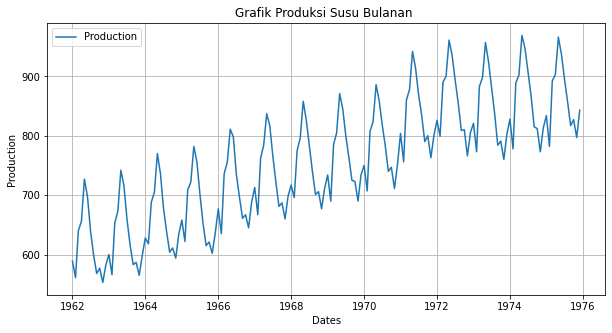

(<matplotlib.legend.Legend at 0x7fba2ebc69a0>, None, None)

In [5]:
# ploting data 
plt.figure(figsize=(10,5))
plt.plot(df, label='Production'), plt.xlabel('Dates'), 
plt.ylabel('Production'), plt.title('Grafik Produksi Susu Bulanan ')
plt.legend(), plt.grid(), plt.show()

**Penjelasan**

Dari hasil ploting grafik data bersifat non stasioner, Data non stasioner adalah data yang tidak memiliki pola yang teratur atau tidak memiliki kecenderungan yang jelas. Data non stasioner dapat menunjukkan fluktuasi yang tinggi atau perubahan yang tidak terprediksi dari waktu ke waktu.

karena data kita bersifat non stasioner maka kita perlu melaukan decompose menggunkan library **statsmodels.tsa.seasonal import seasonal_decompose** . Metode decompose akan memisahkan data menjadi tiga komponen: trend, seassonality, dan residual (sisa). 
1. Komponen trend akan menunjukkan pola dari data dalam jangka waktu yang panjang.
2. komponen seassonality akan menunjukkan pola dari data yang terjadi secara teratur dalam jangka waktu yang lebih pendek. 
3. Komponen residual merupakan sisa dari data yang tidak dapat dijelaskan oleh komponen trend dan seassonality.

In [6]:
# import library decompose
from statsmodels.tsa.seasonal import seasonal_decompose

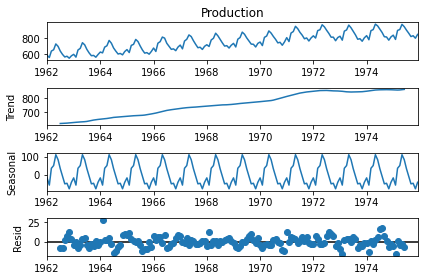

In [7]:
# do decompose
results = seasonal_decompose(df['Production'])
results.plot();

**Penjelasan**

Dengan menggunakan metode decompose diatas kita dapat menganalisis data yang memiliki trend dan seassonality dengan lebih mendalam dan memahami pola yang terjadi pada data tersebut.

In [8]:
# menghitung jumlah baris df
len(df)

168

"len()" akan menghitung jumlah baris dalam objek DataFrame "df". DataFrame "df" memiliki 168 baris. Tujuan dari perhitungan jumlah baris untuk menentukan pembagian data pada tahap spliting data.

# **SPLITING DATA**

Dalam latihan ini saya melakukan pembagian data menjadi training dan testing. Saya memakai semua data kecuali 12 terahir, data 12 terahir saya gunakan sebagai testing set hal ini karena data akan dilatih untuk melakukan prediksi pada 12 bulan terahir dari kumpulan data.

In [31]:
# spliting data
train = df.iloc[:156]
test = df.iloc[156:]

In [22]:
# load data training
train.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [23]:
# load data test
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


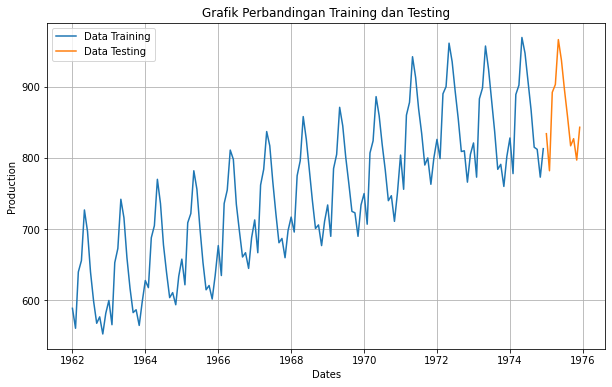

(<matplotlib.legend.Legend at 0x7fe49d544d60>, None, None)

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Data Training')
plt.plot(test, label='Data Testing')
plt.xlabel('Dates'), plt.ylabel('Production')
plt.title('Grafik Perbandingan Training dan Testing')
plt.legend(), plt.grid(), plt.show()

**Penjelasan**

Setelah melakukan spliting data selanjutnya adalah melakukan konversi data menjadi skala rentang antara 0 dan 1. Dengan menggunakan "MinMaxScaler", kita dapat mengubah nilai data ke dalam rentang yang sama (0-1) sehingga lebih mudah untuk dianalisis atau dibandingkan dengan data lain.

In [25]:
# import library minmaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# do scaler
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

**Penjelasan**

Kode di atas merupakan proses scaling data dengan menggunakan metode MinMaxScaler. Proses scaling dilakukan untuk mengubah nilai data ke dalam rentang yang sama (0-1) sehingga lebih mudah untuk dianalisis atau dibandingkan dengan data lain.

Pertama, objek "scaler" akan di-fit dengan data "train" dengan menggunakan fungsi "fit()". Fungsi ini akan mencari nilai maksimum dan minimum dari data "train" sebagai acuan dalam proses scaling.
Kemudian, data "train" akan di-transform dengan menggunakan fungsi "transform()" dan hasilnya akan disimpan ke dalam variabel "scaled_train".
Setelah itu, data "test" akan di-transform dengan menggunakan fungsi "transform()" dan hasilnya akan disimpan ke dalam variabel "scaled_test".

In [18]:
# load data train hasil scaler
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

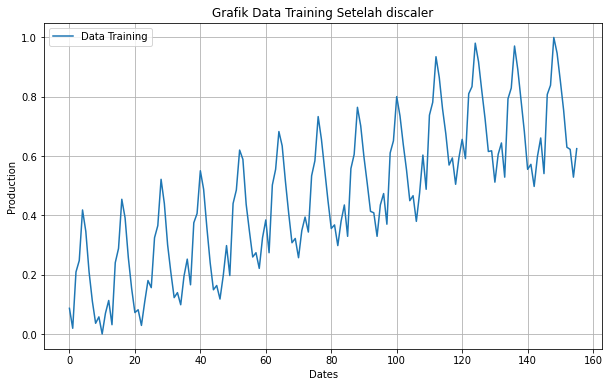

(<matplotlib.legend.Legend at 0x7fe499954b50>, None, None)

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_train, label='Data Training')
plt.xlabel('Dates'), plt.ylabel('Production')
plt.title('Grafik Data Training Setelah discaler')
plt.legend(), plt.grid(), plt.show()

In [19]:
# load data test hasil scaler
scaled_test[:10]

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385]])

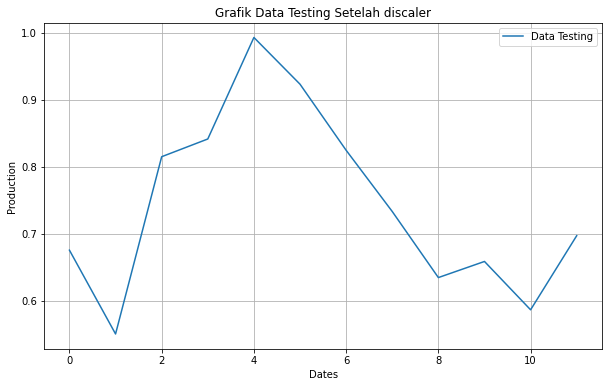

(<matplotlib.legend.Legend at 0x7fe49991f400>, None, None)

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_test, label='Data Testing')
plt.xlabel('Dates'), plt.ylabel('Production')
plt.title('Grafik Data Testing Setelah discaler')
plt.legend(), plt.grid(), plt.show()

Proses selanjutnya adalah membuat generator yang dapat digunakan untuk membuat batch data yang terstruktur dari time series. Kelas ini berguna ketika Anda ingin menggunakan data time series sebagai masukan untuk model deep learning seperti Recurrent Neural Network (RNN).

In [33]:
# import library times seris generator
from keras.preprocessing.sequence import TimeseriesGenerator

In [34]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

**Penjelasan**

Kode di atas akan membuat generator yang dapat digunakan untuk membuat batch data yang terstruktur dari time series dengan menggunakan kelas "TimeseriesGenerator". Data yang akan dijadikan sebagai masukan adalah "scaled_train" dan hasilnya juga akan disimpan ke dalam "scaled_train".

1. Variabel "n_input" akan menentukan jumlah timestep yang akan digunakan dalam setiap batch data. Dalam contoh ini, jumlah timestep adalah 3. Timestep merupakan jumlah waktu yang digunakan untuk memprediksi suatu nilai dalam time series.

2. Variabel "n_features" akan menentukan jumlah fitur yang akan digunakan dalam setiap batch data. Dalam contoh ini, jumlah fitur adalah 1.

Kemudian, generator akan dibuat dengan menggunakan "scaled_train", "scaled_train", "n_input", dan "batch_size" sebagai argument.

In [35]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


**penjelasan**

Kode di atas akan mengambil data pertama dari generator yang telah dibuat dan menampilkannya ke layar.

Pertama, variabel "X" dan "y" akan di-assign dengan data pertama dari generator dengan menggunakan notasi "[]" pada generator. Data "X" merupakan input dari generator yang terdiri dari array dengan shape (batch_size, timestep, fitur), sedangkan data "y" merupakan output dari generator yang terdiri dari array dengan shape (batch_size, fitur).

Kemudian, fungsi "flatten()" akan mengubah data "X" menjadi array 1D dengan menggabungkan semua elemen di dalamnya.

Terakhir, data "X" dan "y" akan dicetak ke layar dengan menggunakan perintah "print()". Dengan menggunakan kode di atas, kita dapat melihat data yang tersedia di dalam generator dan mengecek apakah data tersebut sesuai dengan yang diinginkan.

In [36]:
X.shape

(1, 3, 1)

In [37]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

Kode di atas akan membuat generator yang dapat digunakan untuk membuat batch data yang terstruktur dari time series dengan menggunakan kelas "TimeseriesGenerator". Data yang akan dijadikan sebagai masukan adalah "scaled_train" dan hasilnya juga akan disimpan ke dalam "scaled_train".

Variabel "n_input" akan menentukan jumlah timestep yang akan digunakan dalam setiap batch data. Dalam contoh ini, jumlah timestep adalah 12.
Kemudian, generator akan dibuat dengan menggunakan "scaled_train", "scaled_train", "n_input", dan "batch_size" sebagai argument.

# **DEFINE MODEL**

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

"Sequential", "Dense", dan "LSTM" adalah kelas yang terdapat dalam library "keras" yang digunakan untuk membuat model deep learning.

"Sequential" adalah kelas yang digunakan untuk membuat model neural network yang terdiri dari lapisan-lapisan yang terhubung secara linier.
"Dense" adalah kelas yang digunakan untuk membuat lapisan fully-connected pada model neural network. Lapisan ini akan menerima input dari lapisan sebelumnya, mengolah input tersebut menggunakan fungsi aktivasi, dan menghasilkan output ke lapisan selanjutnya.
"LSTM" (Long Short-Term Memory) adalah kelas yang digunakan untuk membuat lapisan LSTM pada model neural network. Lapisan LSTM merupakan lapisan yang khusus dibuat untuk menangani data time series dan mampu mengingat informasi yang relevan dari waktu yang lalu.

In [39]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Kode di atas akan membuat model neural network yang terdiri dari lapisan LSTM dan lapisan dense.

Pertama, model akan dibuat dengan menggunakan kelas "Sequential".
Kemudian, lapisan LSTM akan ditambahkan ke dalam model dengan menggunakan method "add()". Lapisan ini akan menerima input dengan shape (n_input, n_features) dan mengeluarkan output dengan shape (units,). Fungsi aktivasi yang digunakan adalah "relu".

Setelah itu, lapisan dense akan ditambahkan ke dalam model dengan menggunakan method "add()". Lapisan ini akan menerima input dari lapisan sebelumnya dan mengeluarkan output dengan shape (units,).

Terakhir, model akan dikompilasi dengan menentukan optimizer dan loss function yang akan digunakan. Dalam contoh di atas, optimizer yang digunakan adalah "adam" dan loss function yang digunakan adalah "mean squared error" atau "mse".

In [44]:
# fit model dengan epoch 30
model.fit(generator,epochs=30)

Epoch 1/30
144/144 [==============================] - 2s 13ms/step - loss: 0.0025
Epoch 2/30
144/144 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 3/30
144/144 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 4/30
144/144 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 5/30
144/144 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 6/30
144/144 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 7/30
144/144 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 8/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 9/30
144/144 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 10/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 11/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 12/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0028
Epoch 13/30
144/144 [===

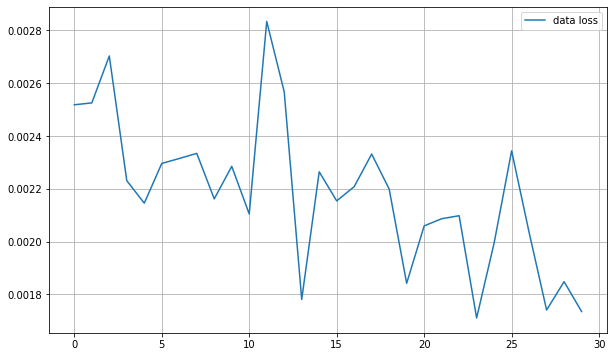

(None, <matplotlib.legend.Legend at 0x7fe43d3325b0>, None)

In [48]:
# melakukan evaluasi data eposch 30
loss_per_epoch = model.history.history['loss']
plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch, label='data loss')
plt.grid(), plt.legend(), plt.show()

In [49]:
last_train_batch = scaled_train[-12:]

**penjelasan**

Kode di atas akan membuat sebuah variabel "last_train_batch" yang berisi data terakhir dari "scaled_train" sebanyak 12 data.

Pertama, indeks terakhir dari "scaled_train" akan ditentukan dengan menggunakan "-12".
Kemudian, data dari indeks tersebut sampai dengan indeks terakhir akan dipilih dan disimpan ke dalam variabel "last_train_batch".

Variabel "last_train_batch" dapat digunakan untuk berbagai keperluan, misalnya untuk memprediksi data terakhir dari time series dengan menggunakan model yang telah terlatih sebelumnya.

In [52]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 21ms/step


array([[0.6415949]], dtype=float32)

**penjelasan**

Kode di atas akan memprediksi data terakhir dari time series dengan menggunakan model yang telah terlatih sebelumnya.

Pertama, variabel "last_train_batch" akan diubah bentuknya dengan menggunakan method "reshape()". Variabel tersebut akan diubah menjadi bentuk 3D array dengan jumlah baris sebanyak 1, jumlah kolom sebanyak "n_input", dan jumlah fitur sebanyak "n_features".
Kemudian, method "predict()" akan dipanggil pada model yang telah dibuat sebelumnya dengan "last_train_batch" sebagai masukannya. Hasil dari method tersebut adalah nilai yang diprediksi oleh model untuk data terakhir dari time series.

In [53]:
scaled_test[0]

array([0.67548077])

In [54]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


**penjelasan**

Kode di atas akan memprediksi seluruh data pada data test dengan menggunakan model yang telah terlatih sebelumnya.

Pertama, sebuah array kosong bernama "test_predictions" akan dibuat untuk menyimpan hasil prediksi yang dihasilkan.

Kemudian, sebuah batch data pertama akan dibuat dari data terakhir dari "scaled_train" sebanyak "n_input" data. Batch tersebut akan disimpan ke dalam variabel "first_eval_batch" dan kemudian diubah bentuknya menjadi 3D array.

Selanjutnya, loop akan dilakukan sebanyak jumlah data pada "test". Pada setiap iterasi, model akan dipanggil dengan menggunakan "current_batch" sebagai masukannya. Hasil dari method "predict()" akan disimpan ke dalam "current_pred".

Kemudian, "current_pred" akan ditambahkan ke dalam array "test_predictions".

Terakhir, "current_batch" akan diupdate dengan menambahkan "current_pred" pada indeks terakhir dari "current_batch" dan menghapus data pada indeks pertama.

Setelah loop selesai dilakukan, array "test_predictions" akan berisi seluruh hasil prediksi yang dihasilkan dari data test. 

Anda dapat mengevaluasi hasil prediksi tersebut dengan membandingkannya dengan nilai sebenarnya dari data test.

In [55]:
test_predictions

[array([0.6415949], dtype=float32),
 array([0.58512676], dtype=float32),
 array([0.77940714], dtype=float32),
 array([0.8386445], dtype=float32),
 array([0.9547914], dtype=float32),
 array([0.93310535], dtype=float32),
 array([0.86108536], dtype=float32),
 array([0.7695281], dtype=float32),
 array([0.6591393], dtype=float32),
 array([0.62950146], dtype=float32),
 array([0.5642104], dtype=float32),
 array([0.6148157], dtype=float32)]

In [64]:
test.head(12)

,Production,Predictions
Date,,
1975-01-01,834,819.903473
1975-02-01,782,796.412731
1975-03-01,892,877.233372
1975-04-01,903,901.876114
1975-05-01,966,950.193233
1975-06-01,937,941.171825
1975-07-01,896,911.211508
1975-08-01,858,873.123686
1975-09-01,817,827.201939


<ipython-input-57-b567fdf24794>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


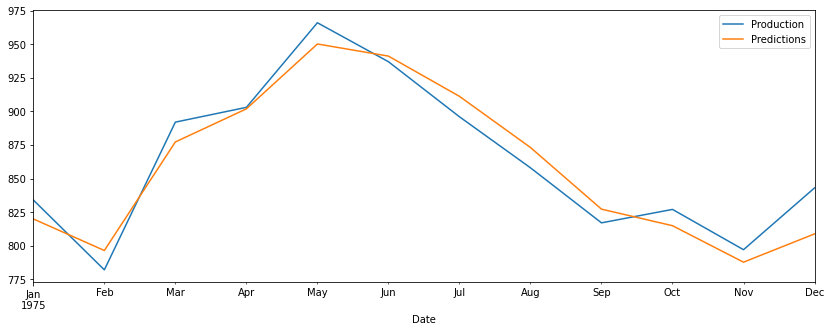

In [57]:
true_predictions = scaler.inverse_transform(test_predictions)
     
test['Predictions'] = true_predictions
     
test.plot(figsize=(14,5))

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)
     

15.445352925984826


# **EVALUASI PROGRAM**

karena skor RMSE masih besar jadi saya melakukan evaluasi dengan mengubah metode pembagian data menjadi 80 : 20. Hal ini berjutuan untuk melihat perbedaanya juga mencari skor RMSE terkecil.

# **Spliting Data (2) 80:20**

In [9]:
len(df)

168

saya menggambil 80% dari data 168 yaitu 134.4 sebagai training dan sisanya sebagai testing.

In [10]:
# spliting data
from sklearn.model_selection import train_test_split

X = df.drop(columns='Production')  # Data input
y = df['Production']  # Data target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**penjelasan**

Di sini, X adalah data input (semua kolom selain kolom 'Production'), dan y adalah data target (kolom 'Production'). Kemudian, kita membagi data menjadi data training dan data testing dengan menggunakan fungsi train_test_split(), dengan test_size=0.2 menunjukkan bahwa kita ingin membagi data menjadi proporsi 80:20 (80% data training dan 20% data testing). Nilai random_state=42 akan menentukan hasil pembagian data secara acak, sehingga Anda akan mendapatkan hasil yang sama jika Anda menjalankan kode tersebut berulang-ulang.

Setelah proses pembagian data selesai, Anda akan mendapatkan empat variabel baru: X_train yang berisi data input untuk data training, X_test yang berisi data input untuk data testing, y_train yang berisi data target untuk data training, dan y_test yang berisi data target untuk data testing. Anda dapat menggunakan variabel-variabel tersebut untuk melakukan pelatihan model dan evaluasi model dengan data yang sesuai.

In [38]:
train = df.iloc[:134]
test = df.iloc[134:]

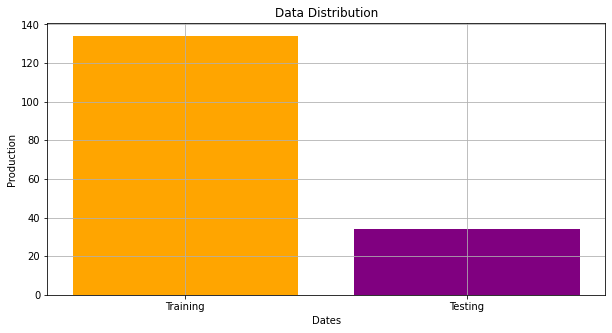

In [41]:
# Menentukan nama-nama data dan jumlah data
data_names = ['Training', 'Testing']
data_counts = [len(train), len(test)]

# Menampilkan grafik
plt.figure(figsize=(10, 5))
plt.bar(data_names[0], data_counts[0], color='orange')
plt.bar(data_names[1], data_counts[1], color='purple')
plt.title('Data Distribution')
plt.xlabel('Dates')
plt.ylabel('Production')
plt.grid()
plt.show()

Melakukan sclaer data menggunakan minmaxsclaer

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [52]:
scaled_train[:10]

array([[0.08823529],
       [0.01960784],
       [0.21323529],
       [0.25245098],
       [0.42647059],
       [0.35294118],
       [0.21323529],
       [0.1127451 ],
       [0.03676471],
       [0.05882353]])

Membuat TimesGenerator guna untuk membuat batch sebagai inputan untuk dep learning.

In [56]:
from keras.preprocessing.sequence  import TimeseriesGenerator

# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08823529 0.01960784 0.21323529]
Predict this y: 
 [[0.25245098]]


In [57]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# **Create Model**

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [59]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [61]:
# fit model with 50 epochs
model.fit(generator,epochs=50)

Epoch 1/50
122/122 [==============================] - 3s 8ms/step - loss: 0.0493
Epoch 2/50
122/122 [==============================] - 1s 11ms/step - loss: 0.0257
Epoch 3/50
122/122 [==============================] - 1s 11ms/step - loss: 0.0171
Epoch 4/50
122/122 [==============================] - 1s 7ms/step - loss: 0.0144
Epoch 5/50
122/122 [==============================] - 1s 8ms/step - loss: 0.0136
Epoch 6/50
122/122 [==============================] - 1s 8ms/step - loss: 0.0103
Epoch 7/50
122/122 [==============================] - 1s 7ms/step - loss: 0.0143
Epoch 8/50
122/122 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 9/50
122/122 [==============================] - 1s 8ms/step - loss: 0.0049
Epoch 10/50
122/122 [==============================] - 1s 8ms/step - loss: 0.0048
Epoch 11/50
122/122 [==============================] - 1s 7ms/step - loss: 0.0042
Epoch 12/50
122/122 [==============================] - 2s 19ms/step - loss: 0.0060
Epoch 13/50
122/122 [=

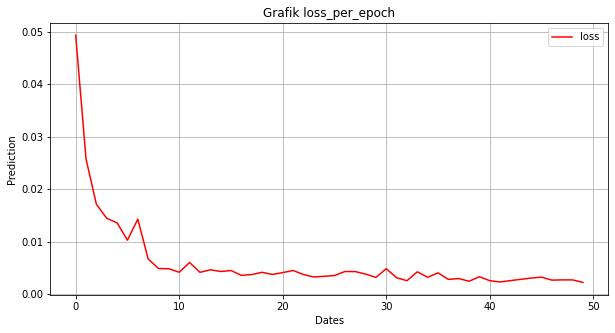

(<matplotlib.legend.Legend at 0x7fb9c4d111c0>, None, None)

In [64]:
# ploting grafik loss
loss_per_epoch = model.history.history['loss']
plt.figure(figsize=(10, 5))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch, label='loss', color='Red')
plt.title('Grafik loss_per_epoch'), plt.xlabel('Dates'), plt.ylabel('Prediction')
plt.legend(), plt.grid(), plt.show()

In [65]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 241ms/step


array([[0.7682454]], dtype=float32)

In [78]:
scaled_test[0]

array([0.80882353])

In [79]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [80]:
test_predictions

[array([0.7682454], dtype=float32),
 array([0.86008], dtype=float32),
 array([0.94775975], dtype=float32),
 array([0.92382663], dtype=float32),
 array([0.8472984], dtype=float32),
 array([0.7445734], dtype=float32),
 array([0.66239274], dtype=float32),
 array([0.6193871], dtype=float32),
 array([0.58076704], dtype=float32),
 array([0.61803627], dtype=float32),
 array([0.6087058], dtype=float32),
 array([0.6100263], dtype=float32),
 array([0.7488262], dtype=float32),
 array([0.84799784], dtype=float32),
 array([0.9178418], dtype=float32),
 array([0.9130168], dtype=float32),
 array([0.8493005], dtype=float32),
 array([0.7553356], dtype=float32),
 array([0.6775047], dtype=float32),
 array([0.62878984], dtype=float32),
 array([0.6059672], dtype=float32),
 array([0.6099415], dtype=float32),
 array([0.6038657], dtype=float32),
 array([0.63603467], dtype=float32),
 array([0.737581], dtype=float32),
 array([0.8323153], dtype=float32),
 array([0.8963537], dtype=float32),
 array([0.90190786], dt

In [81]:
test.head(12)

,Production,Predictions
Date,,
1973-03-01,883,866.444123
1973-04-01,898,903.912642
1973-05-01,957,939.685977
1973-06-01,924,929.921267
1973-07-01,881,898.697741
1973-08-01,837,856.785953
1973-09-01,784,823.256236
1973-10-01,791,805.709933
1973-11-01,760,789.952950


In [82]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

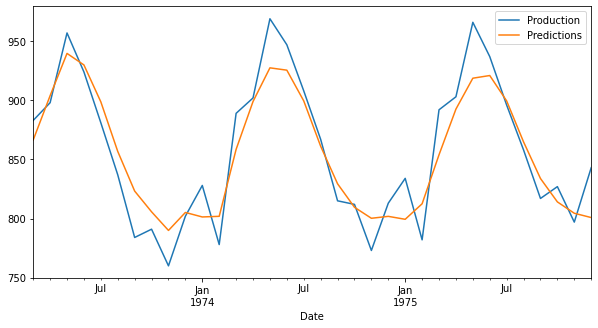

In [85]:
test.plot(figsize=(10,5))

In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

23.08974348293135
